In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [2]:
df = pd.read_csv('../analyze/pollen_weather.csv')
df = df[['Date', 'Alnus']]
df = df.rename(columns={'Date': 'ds', 'Alnus': 'y'})
df['cap'] = 400
# df.head()
df.tail()

,ds,y,cap
7792,2018-03-12,80.0,400
7793,2018-03-13,6.0,400
7794,2018-03-14,100.0,400
7795,2018-03-15,56.0,400
7796,2018-03-16,0.0,400


In [3]:
# m = Prophet(growth='logistic')
m = Prophet()
m.fit(df);

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/bruno.wozniak/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [4]:
future = m.make_future_dataframe(periods=3)
future.tail()
# future = m.make_future_dataframe(periods=3)
# future['cap'] = 400

,ds
7795,2018-03-15
7796,2018-03-16
7797,2018-03-17
7798,2018-03-18
7799,2018-03-19


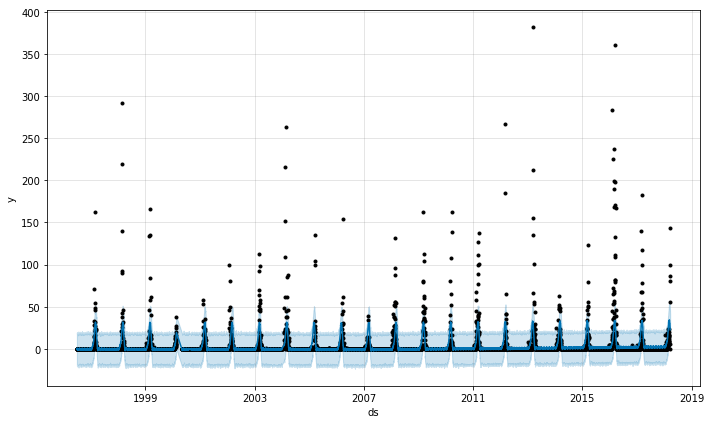

In [5]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
# forecast = m.predict(future)
# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
m.plot(forecast);

In [ ]:
# Python
# m.plot(forecast);

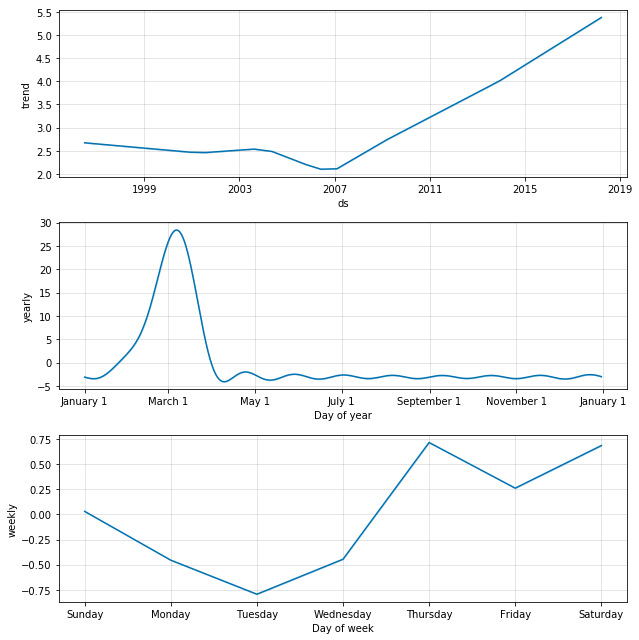

In [6]:
m.plot_components(forecast);